In [2]:
# Load required modules
from datetime import date

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

# Load marineHeatWaves definition module
import marineHeatWaves as mhw

In [3]:
base_url = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/'
files = [f'{base_url}sst.day.mean.{year}.v2.nc' for year in range(1981, 2021)]
files
#https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1984.v2.nc.html

['https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1981.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1982.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1983.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1984.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1985.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1986.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1987.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1988.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1989.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1990.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.

In [4]:
%%time
data = xr.open_mfdataset(files)

CPU times: user 423 ms, sys: 57.8 ms, total: 481 ms
Wall time: 2.4 s


# Case Study #5 - 2019 Caribbean event

#### Plot a lat and lon to visualize the location
##### In this case, we will use a point from the Caribbean (CARIB; 75 ∘ W, 15 ∘ N) over the 1982 to 2014 period.

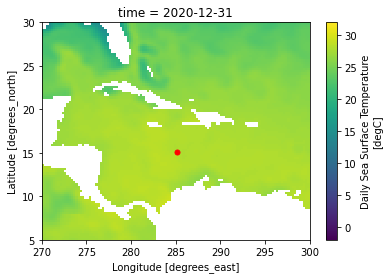

In [12]:
fig, ax = plt.subplots(1,1)
dummy = data.sst.sel(lon = 285, lat = 15, method='nearest')[0]
data.sst[-1,:].plot(ax=ax, vmin=-2,vmax=32)
ax.plot(dummy.lon.values, dummy.lat.values, color='r', ms=5,marker='o')
ax.set_ylim(5,30)
ax.set_xlim(270,300);

#### Load a daily time series of SST (from the same point used above) remotely-sensed from the AVHRR satellite platform

##### Uncomment below to run full function but see below to save time

In [14]:
#%%time
#carib_ds = data.sst.sel(lon = 285, lat = 15, 
             #method='nearest').sel(time = slice("1982-01-01","2020-12-31")).load()

CPU times: user 341 ms, sys: 42.8 ms, total: 383 ms
Wall time: 6min 37s


In [15]:
#carib_ds.to_netcdf('carib_ds.nc')

In [16]:
#Uncomment line below to start from here
carib_ds=xr.open_dataset('carib_ds.nc').sst

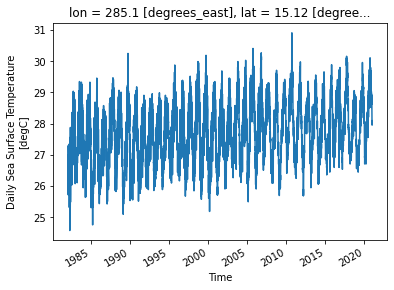

In [17]:
carib_ds.plot()

#### Next we run the MHW detection algorithm which returns the variable mhws, consisting of the detected MHWs, and clim, consisting of the climatological (varying by day-of-year) seasonal cycle and extremes threshold:

In [18]:
# Generate time vector using datetime format (January 1 of year 1 is day 1)
t = np.arange(date(1982,1,1).toordinal(),date(2020,12,31).toordinal()+1)
dates = [date.fromordinal(tt.astype(int)) for tt in t]

In [19]:
# Detect MHW events
mhws_case5, clim_case5 = mhw.detect(t, carib_ds.values, climatologyPeriod=[2015, 2016])

In [33]:
# This algorithm has detected the following number of MHW events:
mhws_case5['category']

['Moderate',
 'Strong',
 'Strong',
 'Severe',
 'Moderate',
 'Strong',
 'Extreme',
 'Strong',
 'Strong',
 'Strong',
 'Strong',
 'Moderate',
 'Moderate',
 'Extreme',
 'Severe',
 'Severe',
 'Moderate',
 'Moderate',
 'Strong',
 'Strong',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Extreme',
 'Moderate',
 'Moderate',
 'Moderate',
 'Strong',
 'Severe',
 'Moderate',
 'Extreme',
 'Strong',
 'Strong',
 'Strong',
 'Strong',
 'Strong',
 'Strong',
 'Moderate',
 'Moderate',
 'Strong',
 'Severe',
 'Strong']

In [22]:
# The first ten events, for example, have the following maximum intensities (in C)
mhws_case5['intensity_max'][0:10]

[0.6195458442934125,
 0.8027268071328457,
 1.2378730158652047,
 0.9214232044835207,
 0.46664293350712427,
 0.7236515783494575,
 1.0747068466678762,
 0.6987392671646653,
 0.7084900640672309,
 0.6708352488856235]

##### Let's have a look at some properties associated with the event that has the largest maximum intensity

In [23]:
ev = np.argmax(mhws_case5['intensity_max']) # largest event
print ('Maximum intensity:', mhws_case5['intensity_max'][ev], 'deg. C')
print ('Average intensity:', mhws_case5['intensity_mean'][ev], 'deg. C')
print ('Cumulative intensity:', mhws_case5['intensity_cumulative'][ev], 'deg. C-days')
print ('Duration:', mhws_case5['duration'][ev], 'days')
print ('Start date:', mhws_case5['date_start'][ev].strftime("%d %B %Y"))
print ('End date:', mhws_case5['date_end'][ev].strftime("%d %B %Y"))

Maximum intensity: 1.7947080673710012 deg. C
Average intensity: 0.5569648996023794 deg. C
Cumulative intensity: 9.46840329324045 deg. C-days
Duration: 17 days
Start date: 06 September 2010
End date: 22 September 2010


##### Let's plot the SST time series over the full record and also have a closer look at the identified MHW event:

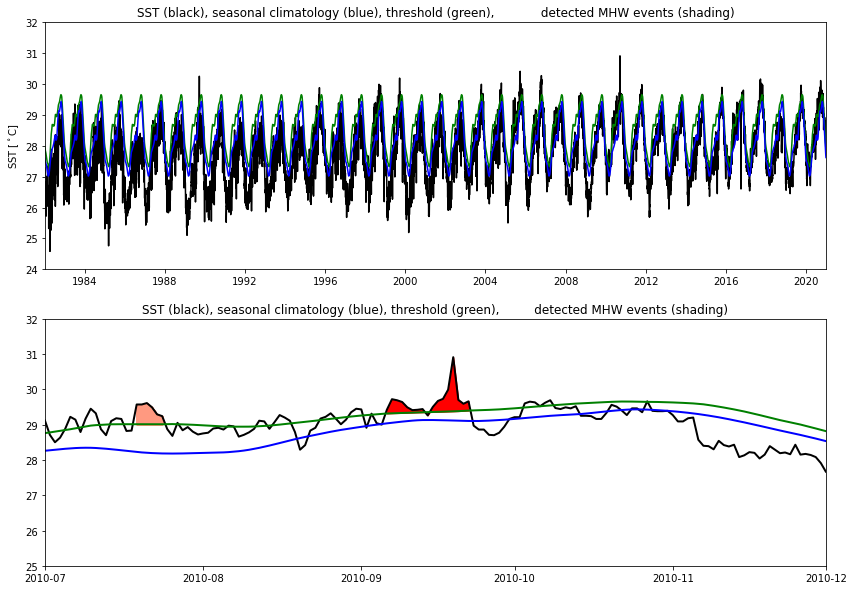

In [24]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
# Plot SST, seasonal cycle, and threshold
plt.plot(dates, carib_ds, 'k-')
plt.plot(dates, clim_case5['thresh'], 'g-')
plt.plot(dates, clim_case5['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), threshold (green), \
           detected MHW events (shading)')
plt.ylim(carib_ds.min()-0.5, carib_ds.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')
plt.xlim(dates[0],dates[-1])
plt.ylim(24,32);

# second plot
plt.subplot(2,1,2)
# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-10, ev+11, 1):
    t1 = np.where(t==mhws_case5['time_start'][ev-1])[0][0]
    t2 = np.where(t==mhws_case5['time_end'][ev-1])[0][0]
    plt.fill_between(dates[t1:t2+1], carib_ds[t1:t2+1], clim_case5['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))
# Find indices for MHW of interest (2012 NWA event) and shade accordingly
t1 = np.where(t==mhws_case5['time_start'][ev])[0][0]
t2 = np.where(t==mhws_case5['time_end'][ev])[0][0]
plt.fill_between(dates[t1:t2+1], carib_ds[t1:t2+1], clim_case5['thresh'][t1:t2+1], color='r')
# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, carib_ds, 'k-', linewidth=2)
plt.plot(dates, clim_case5['thresh'], 'g-', linewidth=2)
plt.plot(dates, clim_case5['seas'], 'b-', linewidth=2)
plt.title('SST (black), seasonal climatology (blue), threshold (green), \
        detected MHW events (shading)')
plt.xlim(date(2010,7,1), date(2010,12,1))
plt.ylim(25,32);

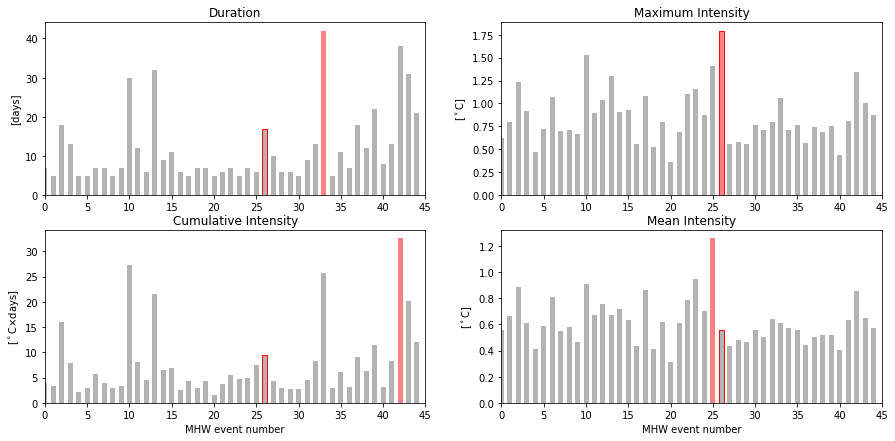

In [25]:
plt.figure(figsize=(15,7))
# Duration
plt.subplot(2,2,1)
evMax = np.argmax(mhws_case5['duration'])
plt.bar(range(mhws_case5['n_events']), mhws_case5['duration'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws_case5['duration'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws_case5['duration'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws_case5['n_events'])
plt.ylabel('[days]')
plt.title('Duration')
# Maximum intensity
plt.subplot(2,2,2)
evMax = np.argmax(mhws_case5['intensity_max'])
plt.bar(range(mhws_case5['n_events']), mhws_case5['intensity_max'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws_case5['intensity_max'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws_case5['intensity_max'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws_case5['n_events'])
plt.ylabel(r'[$^\circ$C]')
plt.title('Maximum Intensity')
# Mean intensity
plt.subplot(2,2,4)
evMax = np.argmax(mhws_case5['intensity_mean'])
plt.bar(range(mhws_case5['n_events']), mhws_case5['intensity_mean'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws_case5['intensity_mean'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws_case5['intensity_mean'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws_case5['n_events'])
plt.title('Mean Intensity')
plt.ylabel(r'[$^\circ$C]')
plt.xlabel('MHW event number')
# Cumulative intensity
plt.subplot(2,2,3)
evMax = np.argmax(mhws_case5['intensity_cumulative'])
plt.bar(range(mhws_case5['n_events']), mhws_case5['intensity_cumulative'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws_case5['intensity_cumulative'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws_case5['intensity_cumulative'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws_case5['n_events'])
plt.title(r'Cumulative Intensity')
plt.ylabel(r'[$^\circ$C$\times$days]')
plt.xlabel('MHW event number');

In [ ]:
mhws_case5['n_events']

In [ ]:
# rank this MHW event
rank, returnPeriod = mhw.rank(t, mhws_case3)
print ("The 2017 Tasman Sea event is ranked number " \
        + str(rank['duration'][ev]) + " by duration")
print ("The 2017 Tasman Sea event is ranked number " \
        + str(rank['intensity_max'][ev]) + " by maximum intensity")
print ("The 2017 Tasman Sea event is ranked number " \
        + str(rank['intensity_mean'][ev]) + " by mean intensity")
print ("The 2017 Tasman Sea event is ranked number " \
        + str(rank['intensity_cumulative'][ev]) + " by cumulative intensity")